Import All Libraries

In [130]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #to plot charts
import seaborn as sns #used for data visualization
import warnings #avoid warning flash
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Loading Dataset

In [131]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Understanding the Datset

In [132]:
df.head() #get familier with dataset, display the top 5 data records

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [133]:
df.shape #getting to know about rows and columns we're dealing with - 768 rows , 9 columns

(768, 9)

In [134]:
df.columns #learning about the columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [135]:
df.dtypes #knowledge of data type helps for computation

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [136]:
df.info() #Print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [137]:
df.describe() #helps us to understand how data has been spread across the table.
# count :- the number of NoN-empty rows in a feature.
# mean :- mean value of that feature.
# std :- Standard Deviation Value of that feature.
# min :- minimum value of that feature.
# max :- maximum value of that feature.
# 25%, 50%, and 75% are the percentile/quartile of each features. 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Cleaning the Dataset

In [138]:
#dropping duplicate values - checking if there are any duplicate rows and dropping if any
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [139]:
#check for missing values, count them and print the sum for every column
df.isnull().sum() #conclusion :- there are no null values in this dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [140]:
#checking for 0 values in 5 columns , Age & DiabetesPedigreeFunction do not have have minimum 0 value so no need to replace , also no. of pregnancies as 0 is possible as observed in df.describe
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


In [141]:
#replacing 0 values with median of that column
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())#normal distribution
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())#normal distribution
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())#skewed distribution
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())#skewed distribution
df['BMI']=df['BMI'].replace(0,df['BMI'].median())#skewed distribution

Data Visualization

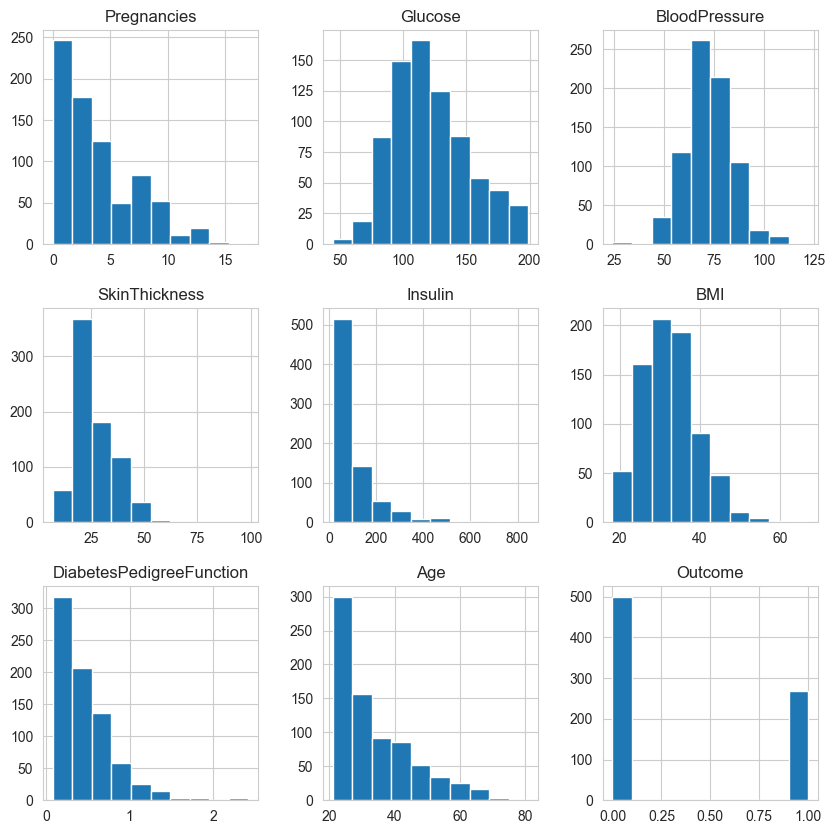

In [142]:
#histogram for each  feature
df.hist(bins=10,figsize=(10,10))
plt.show()

Feature Selection

<AxesSubplot: >

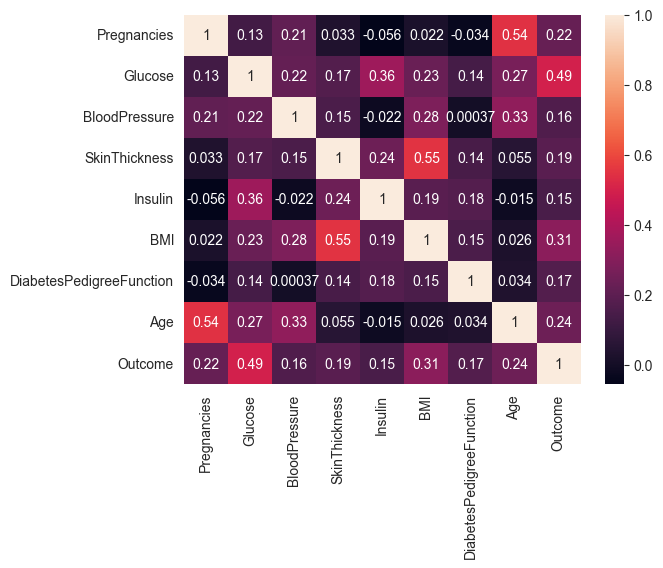

In [143]:
corrmat=df.corr()
sns.heatmap(corrmat, annot=True)

In [144]:
df_selected=df.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis='columns')

Handling Outliners

In [145]:
from sklearn.preprocessing import QuantileTransformer
x=df_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']
df_new.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.091265,0.644720,0.213168,0.558670,0.0
2,0.863755,0.956975,0.357888,0.077575,0.585398,1.0
3,0.232725,0.124511,0.357888,0.284224,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0


Splitting the Data Frame into X and Y

In [146]:
target_name='Outcome'
y= df_new[target_name]#given predictions - training data 
X=df_new.drop(target_name,axis=1)#dropping the Outcome column and keeping all other columns as X

In [147]:
X.head() # contains only independent features 

,Pregnancies,Glucose,SkinThickness,BMI,Age
0,0.747718,0.810300,0.801825,0.591265,0.889831
1,0.232725,0.091265,0.644720,0.213168,0.558670
2,0.863755,0.956975,0.357888,0.077575,0.585398
3,0.232725,0.124511,0.357888,0.284224,0.000000
4,0.000000,0.721643,0.801825,0.926988,0.606258


In [148]:
y.head() #contains dependent feature

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Outcome, dtype: float64

Train Test Split

In [149]:
#Here we're using 80% train and 20% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)#splitting data in 80% train, 20%test

In [150]:
X_train.shape,y_train.shape

((614, 5), (614,))

In [151]:
X_test.shape,y_test.shape

((154, 5), (154,))

Classification Algorithms

1. Using Naive Bayes Algorithm

In [152]:
import sklearn
import sklearn.naive_bayes
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

param_grid_nb = {
    'var_smoothing': np.logspace(0,-2, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)

In [153]:
best_model= nbModel_grid.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [154]:
nb_pred=best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       107
         1.0       0.64      0.53      0.58        47

    accuracy                           0.77       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.76      0.77      0.76       154


 F1:
 0.5813953488372093

 Precision score is:
 0.6410256410256411

 Recall score is:
 0.5319148936170213

 Confusion Matrix:



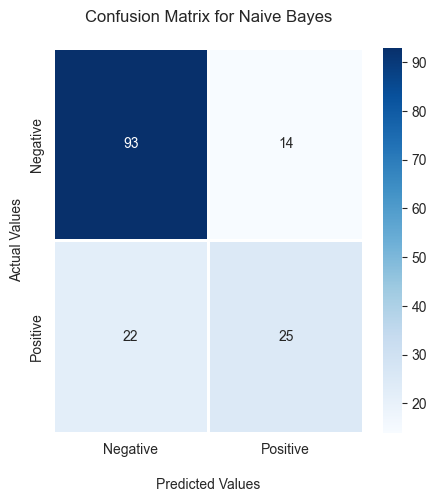

In [155]:
print("Classification Report is:\n",sklearn.metrics.classification_report(y_test,nb_pred))
print("\n F1:\n",sklearn.metrics.f1_score(y_test,nb_pred))
print("\n Precision score is:\n",sklearn.metrics.precision_score(y_test,nb_pred))
print("\n Recall score is:\n",sklearn.metrics.recall_score(y_test,nb_pred))
print("\n Confusion Matrix:\n")
# sns.heatmap(sklearn.metrics.confusion_matrix(y_test,nb_pred))

# Confusion metrics NB
NB_cm = sklearn.metrics.confusion_matrix(y_test, nb_pred)

plt.figure(figsize = (5, 5))
NB_ax = sns.heatmap(NB_cm, cmap = 'Blues',
                    linecolor = 'white',
                    linewidth = 1,
                    annot = True,
                    fmt = '',
                    xticklabels = ['Negative', 'Positive'],
                    yticklabels = ['Negative', 'Positive'])
NB_ax.set_title("Confusion Matrix for Naive Bayes\n")
NB_ax.set_xlabel("\nPredicted Values")
NB_ax.set_ylabel("Actual Values")
plt.show()


Naive Bayes : AUCROC = 0.701


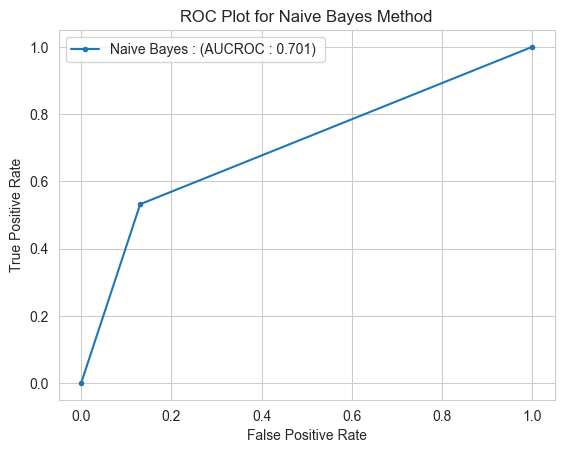

In [156]:
#Count AUC Naive Bayes Classifier
nb_auc = roc_auc_score(y_test, nb_pred)
print('Naive Bayes : AUCROC = %.3f' % (nb_auc))

#Save the data for making the AUC ROC Curve
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_pred)

#Create Curve AUC ROC using matplotlib.pyplot
plt.plot(nb_fpr, nb_tpr, marker='.' ,label="Naive Bayes : (AUCROC : %.3f) " % nb_auc)
plt.title('ROC Plot for Naive Bayes Method')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

2. Using SVM Algorithm

In [157]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

In [158]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

In [159]:
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [160]:
grid_result = grid_search.fit(X, y)

In [161]:
svm_pred=grid_result.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.86      0.89      0.88       107
         1.0       0.73      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.82      0.82      0.82       154


 F1:
 0.7032967032967034

 Precision score is:
 0.7272727272727273

 Recall score is:
 0.6808510638297872

 Confusion Matrix:



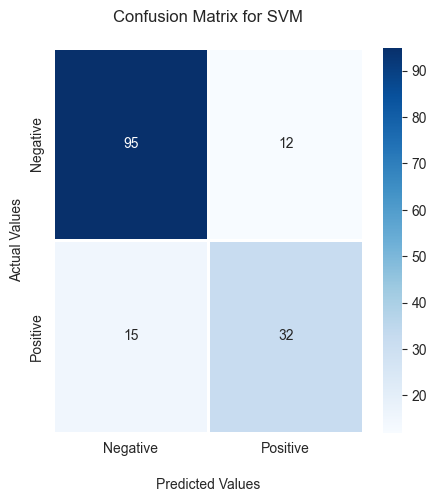

In [162]:
print("Classification Report is:\n",sklearn.metrics.classification_report(y_test,svm_pred))
print("\n F1:\n",sklearn.metrics.f1_score(y_test,svm_pred))
print("\n Precision score is:\n",sklearn.metrics.precision_score(y_test,svm_pred))
print("\n Recall score is:\n",sklearn.metrics.recall_score(y_test,svm_pred))
print("\n Confusion Matrix:\n")
# sns.heatmap(sklearn.metrics.confusion_matrix(y_test,svm_pred))

# Confusion metrics NB
SVM_cm = sklearn.metrics.confusion_matrix(y_test, svm_pred)

plt.figure(figsize = (5, 5))
NB_ax = sns.heatmap(SVM_cm, cmap = 'Blues',
                    linecolor = 'white',
                    linewidth = 1,
                    annot = True,
                    fmt = '',
                    xticklabels = ['Negative', 'Positive'],
                    yticklabels = ['Negative', 'Positive'])
NB_ax.set_title("Confusion Matrix for SVM\n")
NB_ax.set_xlabel("\nPredicted Values")
NB_ax.set_ylabel("Actual Values")
plt.show()

svm : AUCROC = 0.784


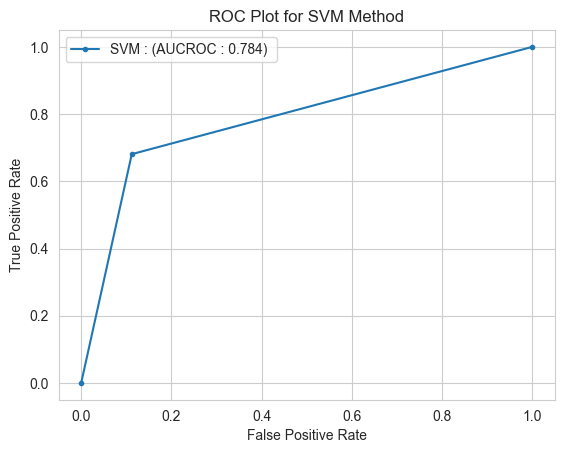

In [163]:
#Count AUC svm Classifier
svm_auc = roc_auc_score(y_test, svm_pred)
print('svm : AUCROC = %.3f' % (svm_auc))

#Save the data for making the AUC ROC Curve
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_pred)

#Create Curve AUC ROC using matplotlib.pyplot
plt.plot(svm_fpr, svm_tpr, marker='.' ,label="SVM : (AUCROC : %.3f) " % svm_auc)
plt.title('ROC Plot for SVM Method')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

3. Using K-Nearest Neighbor

In [164]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

In [165]:
#List Hyperparameters to tune
knn= KNeighborsClassifier()
n_neighbors = list(range(15,25))
p=[1,2]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

#convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p,weights=weights,metric=metric)

#Making model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [166]:
best_model = grid_search.fit(X_train,y_train)

In [167]:
#Best Hyperparameters Value
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 30
Best p: 1
Best n_neighbors: 19


In [168]:
#Predict testing set
knn_pred = best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.85      0.88      0.86       107
         1.0       0.70      0.64      0.67        47

    accuracy                           0.81       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.80      0.81      0.80       154


 F1:
 0.6666666666666666

 Precision score is:
 0.6976744186046512

 Recall score is:
 0.6382978723404256

 Confusion Matrix:



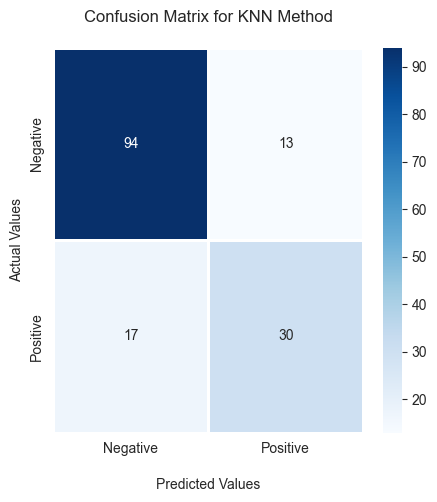

In [169]:
print("Classification Report is:\n",classification_report(y_test,knn_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
# sns.heatmap(confusion_matrix(y_test,knn_pred))

# Confusion metrics NB
KNN_cm = sklearn.metrics.confusion_matrix(y_test, knn_pred)

plt.figure(figsize = (5, 5))
NB_ax = sns.heatmap(KNN_cm, cmap = 'Blues',
                    linecolor = 'white',
                    linewidth = 1,
                    annot = True,
                    fmt = '',
                    xticklabels = ['Negative', 'Positive'],
                    yticklabels = ['Negative', 'Positive'])
NB_ax.set_title("Confusion Matrix for KNN Method\n")
NB_ax.set_xlabel("\nPredicted Values")
NB_ax.set_ylabel("Actual Values")
plt.show()



KNN : AUCROC = 0.758


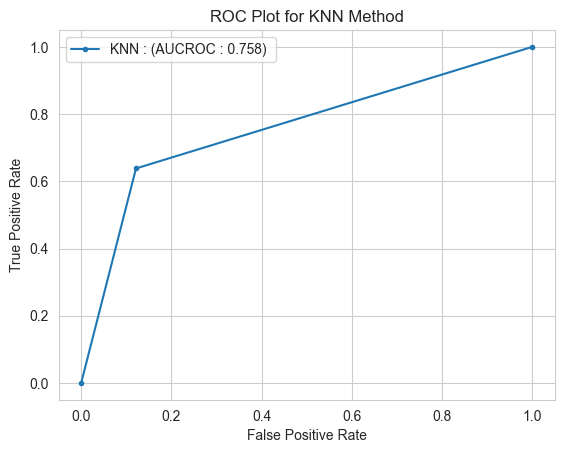

In [170]:
#Count AUC KNN Classifier
knn_auc = roc_auc_score(y_test, knn_pred)
print('KNN : AUCROC = %.3f' % (knn_auc))

#Save the data for making the AUC ROC Curve
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_pred)

#Create Curve AUC ROC using matplotlib.pyplot
plt.plot(knn_fpr, knn_tpr, marker='.' ,label="KNN : (AUCROC : %.3f) " % knn_auc)
plt.title('ROC Plot for KNN Method')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()